<a href="https://colab.research.google.com/github/CamposJoao/applied-computational-intelligence/blob/main/HomeWork1_ICA_rev_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1 - Análise Estatística no Contexto de Predição de Mudança de Emprego

Thaís C. Sampaio, João Pedro Campos

Departamento de Engenharia de Teleinformática

Universidade Federal do Ceará, Fortaleza, Brasil

Emails: {thaisc, joaopedroscampos\}@alu.ufc.br}





Os dados são do dataset do kaggle e com HR Analytics: Job Change of Data Scientists

O objetivo do dataset é "Predict who will move to a new job"

"predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision."

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

##Leitura dos dados do HR Analytics: Job Change of Data Scientists

###Montagem do Drive para acessar o dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


O dataset é dividido em um arquivo de treino e um arquivo de teste. 

###Leitura dos dados de treino HR Analytics: Job Change of Data Scientists.

In [ ]:
dftrain = pd.read_csv('/content/drive/MyDrive/ICA/aug_train.csv')

In [ ]:
dftrain

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


###Leitura dos dados de teste HR Analytics: Job Change of Data Scientists

In [ ]:
dftest = pd.read_csv('/content/drive/MyDrive/ICA/aug_test.csv')

In [ ]:
dftest

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


## Task 1 
Describe your data and their features in terms of number of observations $N$, number of predictor variables $D$, number of classes $L$ and class-distribution (that is, the number of observations for each of the classes). Make sure that predictors are numerical, not categorical.


###Análise inicial dos dados


Utilizaremos os dados de treino para a análise por estarem com todas as colunas, ou seja, 14 colunas em que uma delas estão as classes. No arquivo dos dados de teste não possui a coluna de classes.

Tamanho do banco de dados HR Analytics: Job Change of Data Scientists para treino (número de linhas e número de colunas)



In [ ]:
print(dftrain.shape)

(19158, 14)


Tamanho do banco de dados HR Analytics: Job Change of Data Scientists para treino (número de dados)

In [ ]:
print(dftrain.size)

268212


In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Análise inicial dos dados:

Verificando o tipo de cada coluna, podemos diferenciar os dados categóricos e dados numéricos. Assim, temos:

14 colunas e 12 preditores
- 2 preditores numéricos
- 10 preditores categóricos

Column 0 : enrollee_id : Unique ID for candidate

Column 1 : city: City code

Column 2 : city_ development _index : Developement index of the city (scaled)

Column 3 : gender: Gender of candidate

Column 4 : relevent_experience: Relevant experience of candidate

Column 5 : enrolled_university: Type of University course enrolled if any

Column 6 : education_level: Education level of candidate

Column 7 : major_discipline :Education major discipline of candidate

Column 8 : experience: Candidate total experience in years

Column 9 : company_size: No of employees in current employer's company

Column 10 : company_type : Type of current employer

Column 11 : lastnewjob: Difference in years between previous job and current job

Column 12 : training_hours: training hours completed

Column 13 : target: 0 – Not looking for job change, 1 – Looking for a job change

####Número de elementos faltantes

O próximo passo é verificar quantos valores nulos cada coluna possui. Fazemos isso através da seguinte função.

In [ ]:
dftrain.isnull().sum()#verificar elementos faltantes no dataset

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

Assim, verificamos as colunas que possuem valores nulos.

###Visualização dos dados por frequência

#### Preditores numéricos

Column 2 : city_ development _index : Developement index of the city (scaled)

Column 12 : training_hours: training hours completed

Text(0.5, 0, 'Developement index of the city')

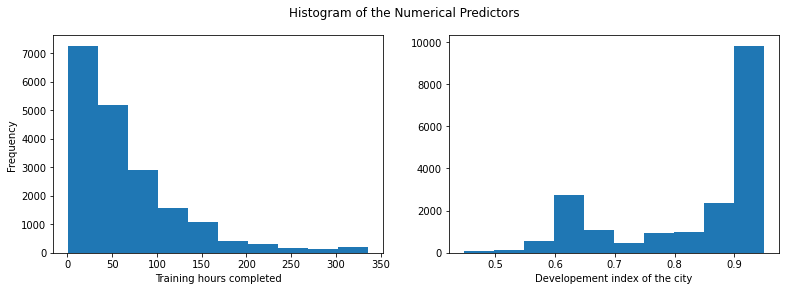

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(13, 4))
fig.suptitle('Histogram of the Numerical Predictors')
ax1.hist(dftrain['training_hours'])
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Training hours completed')
ax2.hist(dftrain['city_development_index'])
ax2.set_xlabel('Developement index of the city')

#### Classes (binário)

Column 13 : target: 0 – Not looking for job change, 1 – Looking for a job change

In [ ]:
T = dftrain['target'].value_counts()  
plt.figure(figsize=[4,3])
sns.barplot(T.index, T.values)
plt.title('Target Class Distribution')
plt.ylabel('Frequency')
plt.xlabel('Target')
plt.savefig('class.pdf')
plt.show();

NameError: ignored

#### Preditores categóricos

#####Nominal

Column 1 : city: City code

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


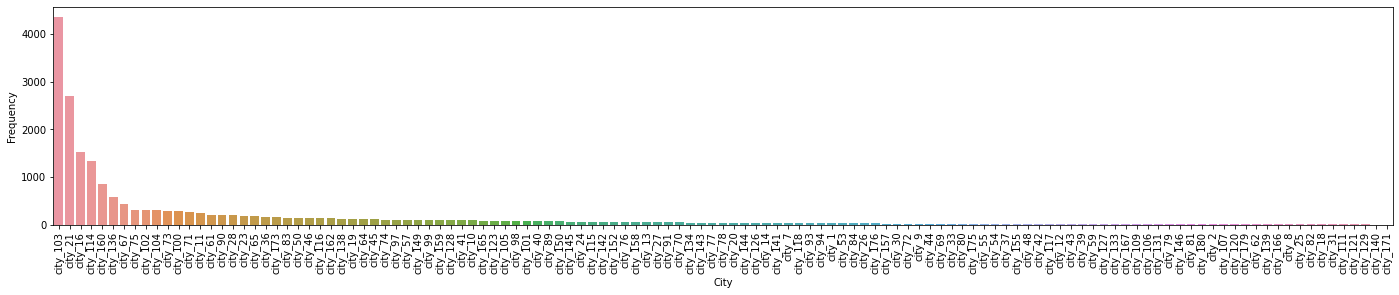

In [ ]:
C = dftrain['city'].value_counts()
plt.figure(figsize=[24,4])
sns.barplot(C.index, C.values)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.xlabel('City')
plt.show();

Column 3 : gender: Gender of candidate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


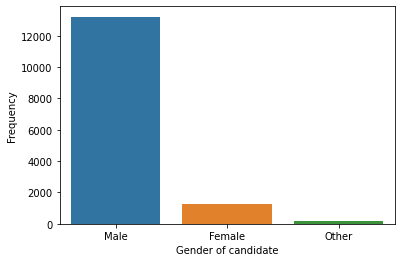

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [ ]:
G = dftrain['gender'].value_counts()  
sns.barplot(G.index, G.values)
plt.ylabel('Frequency')
plt.xlabel('Gender of candidate')
plt.show();
dftrain['gender'].value_counts()

In [ ]:
dftrain['gender'].isnull().sum()

4508

Column 5 : enrolled_university: Type of University course enrolled if any

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


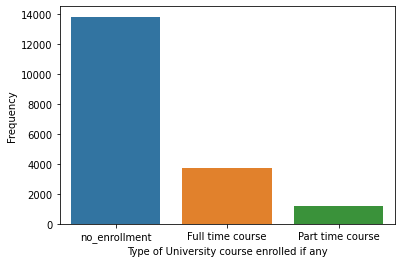

In [ ]:
EU = dftrain['enrolled_university'].value_counts()  
sns.barplot(EU.index, EU.values)
plt.ylabel('Frequency')
plt.xlabel('Type of University course enrolled if any')
plt.show();

Column 7 : major_discipline :Education major discipline of candidate

**S**cience

**T**echnology

**E**ngineering

**M**athematics

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


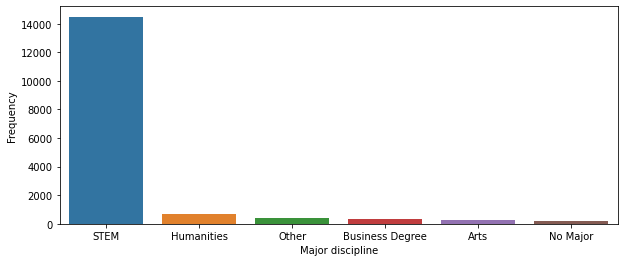

2813

In [ ]:
MD = dftrain['major_discipline'].value_counts()
plt.figure(figsize=[10,4])
sns.barplot(MD.index, MD.values)
plt.ylabel('Frequency')
plt.xlabel('Major discipline')
plt.show();
dftrain['major_discipline'].isnull().sum()

Column 10 : company_type : Type of current employer

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


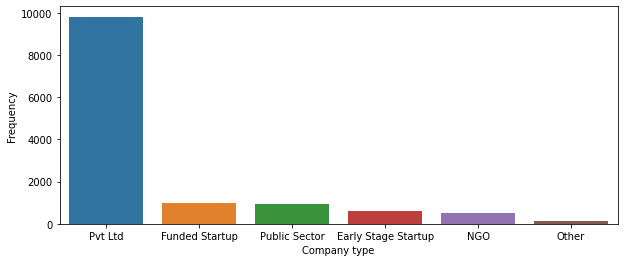

In [ ]:
CT = dftrain['company_type'].value_counts()  
plt.figure(figsize=[10,4])
sns.barplot(CT.index, CT.values)
plt.ylabel('Frequency')
plt.xlabel('Company type')
plt.show();

#####Binário
Column 4 : relevent_experience: Relevant experience of candidate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


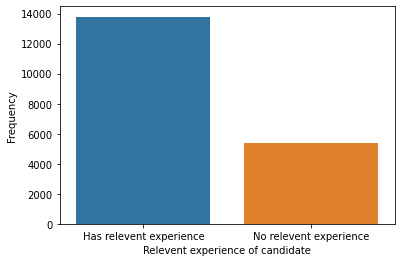

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [ ]:
RE = dftrain['relevent_experience'].value_counts()  
sns.barplot(RE.index, RE.values)
plt.ylabel('Frequency')
plt.xlabel('Relevent experience of candidate')
plt.show();
dftrain['relevent_experience'].value_counts()

##### Ordinal

Column 6 : education_level: Education level of candidate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


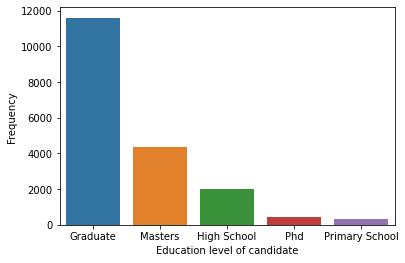

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [ ]:
EL = dftrain['education_level'].value_counts()  
sns.barplot(EL.index, EL.values)
plt.ylabel('Frequency')
plt.xlabel('Education level of candidate')
plt.show();
dftrain['education_level'].value_counts()

Column 8 : experience: Candidate total experience in years

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


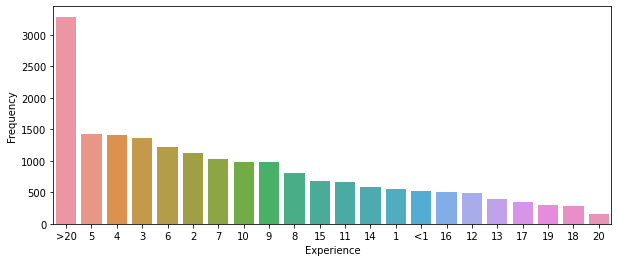

In [ ]:
E = dftrain['experience'].value_counts()
plt.figure(figsize=[10,4])
sns.barplot(E.index, E.values)
plt.ylabel('Frequency')
plt.xlabel('Experience')
plt.show();

Column 9 : company_size: No of employees in current employer's company

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


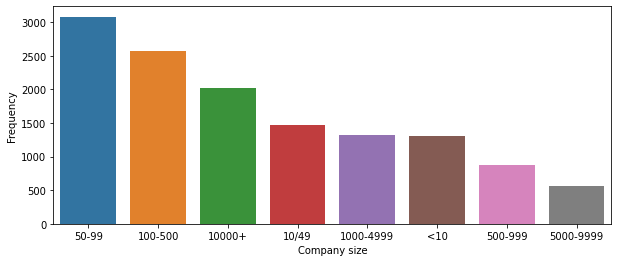

In [ ]:
CS = dftrain['company_size'].value_counts() 
plt.figure(figsize=[10,4])
sns.barplot(CS.index, CS.values)
plt.ylabel('Frequency')
plt.xlabel('Company size')
plt.show();

Column 11 : lastnewjob: Difference in years between previous job and current job

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


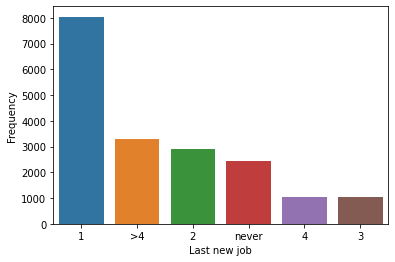

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [ ]:
LNJ = dftrain['last_new_job'].value_counts()  
sns.barplot(LNJ.index, LNJ.values)
plt.ylabel('Frequency')
plt.xlabel('Last new job')
plt.show();
dftrain['last_new_job'].value_counts()

###Substituição dos dados categóricos por escala numérica (variáveis do tipo string para tipo float)

In [ ]:
dftrain['relevent_experience'].replace({'No relevent experience': 0}, inplace=True)
dftrain['relevent_experience'].replace({'Has relevent experience': 1}, inplace=True)

In [ ]:
dftrain['gender'].replace({'Other': 0}, inplace=True)
dftrain['gender'].replace({'Male': 1}, inplace=True)
dftrain['gender'].replace({'Female': 2}, inplace=True)

In [ ]:
dftrain['enrolled_university'].replace({'no_enrollment': 0}, inplace=True)
dftrain['enrolled_university'].replace({'Part time course': 1}, inplace=True)
dftrain['enrolled_university'].replace({'Full time course': 2}, inplace=True)

In [ ]:
dftrain['last_new_job'].replace({'never': 0}, inplace=True)
dftrain['last_new_job'].replace({'1': 1}, inplace=True)
dftrain['last_new_job'].replace({'2': 2}, inplace=True)
dftrain['last_new_job'].replace({'3': 3}, inplace=True)
dftrain['last_new_job'].replace({'4': 4}, inplace=True)
dftrain['last_new_job'].replace({'>4': 5}, inplace=True)

In [ ]:
dftrain['education_level'].replace({'Primary School': 0}, inplace=True)
dftrain['education_level'].replace({'High School': 1}, inplace=True)
dftrain['education_level'].replace({'Graduate': 2}, inplace=True)
dftrain['education_level'].replace({'Masters': 3}, inplace=True)
dftrain['education_level'].replace({'Phd': 4}, inplace=True)

In [ ]:
dftrain['company_type'].fillna('Unknown',inplace=True)
dftrain['company_type'].replace({'Unknown': 0}, inplace=True)
dftrain['company_type'].replace({'Other': 1}, inplace=True)
dftrain['company_type'].replace({'Pvt Ltd': 2}, inplace=True)
dftrain['company_type'].replace({'Early Stage Startup': 3}, inplace=True)
dftrain['company_type'].replace({'Funded Startup': 4}, inplace=True)
dftrain['company_type'].replace({'Public Sector': 5}, inplace=True)
dftrain['company_type'].replace({'NGO': 6}, inplace=True)

In [ ]:
dftrain['company_size'].fillna('Unknown',inplace=True)
dftrain['company_size'].replace({'Unknown': 0}, inplace=True)
dftrain['company_size'].replace({'<10': 1}, inplace=True)
dftrain['company_size'].replace({'10/49': 2}, inplace=True)
dftrain['company_size'].replace({'50-99': 3}, inplace=True)
dftrain['company_size'].replace({'100-500': 4}, inplace=True)
dftrain['company_size'].replace({'500-999': 5}, inplace=True)
dftrain['company_size'].replace({'1000-4999': 6}, inplace=True)
dftrain['company_size'].replace({'5000-9999': 7}, inplace=True)
dftrain['company_size'].replace({'10000+': 8}, inplace=True)

In [ ]:
dftrain['major_discipline'].fillna('Unknown',inplace=True)
dftrain['major_discipline'].replace({'Unknown': 0}, inplace=True)
dftrain['major_discipline'].replace({'No Major': 1}, inplace=True)
dftrain['major_discipline'].replace({'Arts': 2}, inplace=True)
dftrain['major_discipline'].replace({'Humanities': 3}, inplace=True)
dftrain['major_discipline'].replace({'Business Degree': 4}, inplace=True)
dftrain['major_discipline'].replace({'STEM': 5}, inplace=True)
dftrain['major_discipline'].replace({'Other': 6}, inplace=True)

In [ ]:
dftrain['experience'].replace({'<1': 0}, inplace=True)
dftrain['experience'].replace({'1': 1}, inplace=True)
dftrain['experience'].replace({'2': 2}, inplace=True)
dftrain['experience'].replace({'3': 3}, inplace=True)
dftrain['experience'].replace({'4': 4}, inplace=True)
dftrain['experience'].replace({'5': 5}, inplace=True)
dftrain['experience'].replace({'6': 6}, inplace=True)
dftrain['experience'].replace({'7': 7}, inplace=True)
dftrain['experience'].replace({'8': 8}, inplace=True)
dftrain['experience'].replace({'9': 9}, inplace=True)
dftrain['experience'].replace({'10': 10}, inplace=True)
dftrain['experience'].replace({'11': 11}, inplace=True)
dftrain['experience'].replace({'12': 12}, inplace=True)
dftrain['experience'].replace({'13': 13}, inplace=True)
dftrain['experience'].replace({'14': 14}, inplace=True)
dftrain['experience'].replace({'15': 15}, inplace=True)
dftrain['experience'].replace({'16': 16}, inplace=True)
dftrain['experience'].replace({'17': 17}, inplace=True)
dftrain['experience'].replace({'18': 18}, inplace=True)
dftrain['experience'].replace({'19': 19}, inplace=True)
dftrain['experience'].replace({'20': 20}, inplace=True)
dftrain['experience'].replace({'>20': 21}, inplace=True)

In [ ]:
#encoding city feature using label encoder
le = preprocessing.LabelEncoder()
dftrain['city'] = le.fit_transform(dftrain['city'])

Todos os preditores categóricos transformados em numéricos

In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  int64  
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  float64
 4   relevent_experience     19158 non-null  int64  
 5   enrolled_university     18772 non-null  float64
 6   education_level         18698 non-null  float64
 7   major_discipline        19158 non-null  int64  
 8   experience              19093 non-null  float64
 9   company_size            19158 non-null  int64  
 10  company_type            19158 non-null  int64  
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(7), int64(7)
memory usage: 

## Task 2 - Unconditional mono-variate analysis
Perform an unconditional mono-variate analysis of each of the $D$ predictors. Specifically, you must plot their (unconditional) histogram, calculate their(unconditional) mean $µ_d$, standard deviation $σ_d$ and skewness $γ_d$, with $d$ = $1$, . . . , $D$, using all the $N$ observations. [To calculate means, standard deviations and skewness, you can either use native functions or implement appropriate expression yourself]


###Tabela com a média, o desvio padrão e a Skewness de cada preditor

In [ ]:
# Computing the mean, std, and skewness of the dataset:
unc_monovar = dftrain.describe().iloc[1:3,1:-1].append(dftrain.skew()[1:-1], ignore_index=True)
unc_monovar.index = ['Mean','std','Skewness']
display(unc_monovar.T)

,Mean,std,Skewness
city,44.193914,35.464009,0.400250
city_development_index,0.828848,0.123362,-0.995428
gender,1.071468,0.304042,1.825044
relevent_experience,0.719908,0.449056,-0.979527
enrolled_university,0.464095,0.805619,1.265138
education_level,2.136699,0.690579,-0.083229
major_discipline,4.112642,1.834473,-1.632240
experience,10.100141,6.777024,0.409034
company_size,2.935014,2.679853,0.511097
company_type,1.746999,1.532524,0.768130


###Histograma dos preditores

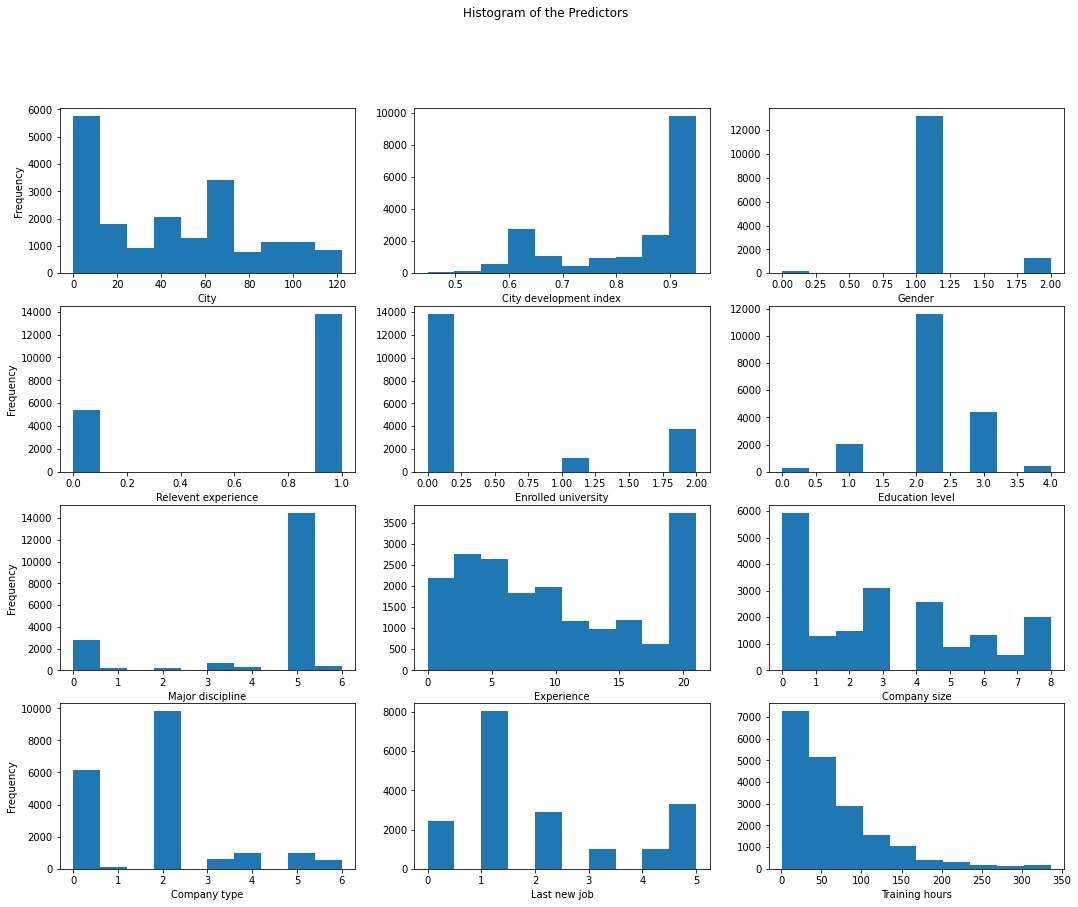

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(18, 14))
fig.suptitle('Histogram of the Predictors')
axs[0, 0].hist(dftrain['city'])
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xlabel('City')
axs[0, 1].hist(dftrain['city_development_index'])
axs[0, 1].set_xlabel('City development index')
axs[0, 2].hist(dftrain['gender'])
axs[0, 2].set_xlabel('Gender')
axs[1, 0].hist(dftrain['relevent_experience'])
axs[1, 0].set_xlabel('Relevent experience')
axs[1, 0].set_ylabel('Frequency')
axs[1, 1].hist(dftrain['enrolled_university'])
axs[1, 1].set_xlabel('Enrolled university')
axs[1, 2].hist(dftrain['education_level'])
axs[1, 2].set_xlabel('Education level')
axs[2, 0].hist(dftrain['major_discipline'])
axs[2, 0].set_xlabel('Major discipline')
axs[2, 0].set_ylabel('Frequency')
axs[2, 1].hist(dftrain['experience'])
axs[2, 1].set_xlabel('Experience')
axs[2, 2].hist(dftrain['company_size'])
axs[2, 2].set_xlabel('Company size')
axs[3, 0].hist(dftrain['company_type'])
axs[3, 0].set_xlabel('Company type')
axs[3, 0].set_ylabel('Frequency')
axs[3, 1].hist(dftrain['last_new_job'])
axs[3, 1].set_xlabel('Last new job')
axs[3, 2].hist(dftrain['training_hours'])
axs[3, 2].set_xlabel('Training hours')

plt.savefig('hist_data.pdf')

## Task 3
Perform a class-conditional mono-variate analysis of each of the predictors. Again, you must plot their (class-conditional) histogram, calculate their (class-conditional) mean $µ_{d|l}$, standard deviation $σ_{d|l}$ and skewness $γ_{d|l}$, with $d$ = $1$, . . . , $D$, now using only the $N_l$ observations of class $l$, for each the $L$ classes

###Tabela com a média, o desvio padrão e a Skewness de cada preditor para classe de valor 0
0 – Not looking for job change

In [ ]:
# Grouping each class:
cls = dftrain.groupby('target')
classes = ['0 – Not looking for job change', '1 – Looking for a job change']
cls_monovar = []
# Computing the mean, std, and skewness of the grouped observatios corresponding 0 – Not looking for job change:
cls_monovar.append(cls.get_group(0).describe().iloc[1:3,1:-1].append(cls.get_group(0).skew()[1:-1], ignore_index=True))                                                                          
cls_monovar[0].index = ['Mean','std','Skewness']
display(classes[0], cls_monovar[0].T)

'0 – Not looking for job change'

,Mean,std,Skewness
city,43.044573,36.227003,0.492098
city_development_index,0.853139,0.105354,-1.451786
gender,1.068460,0.298029,1.885516
relevent_experience,0.753147,0.431196,-1.174324
enrolled_university,0.392974,0.753720,1.520984
education_level,2.141248,0.719561,-0.115120
major_discipline,4.053612,1.880277,-1.535960
experience,10.789734,6.783878,0.278303
company_size,3.217301,2.636667,0.386236
company_type,1.896391,1.500014,0.711622


###Tabela com a média, o desvio padrão e a Skewness de cada preditor para classe de valor 1
1 – Not looking for job change

In [ ]:
# Computing the mean, std, and skewness of the grouped observatios corresponding 1 – Looking for a job change:
cls_monovar.append(cls.get_group(1).describe().iloc[1:3,1:-1].append(cls.get_group(1).skew()[1:-1], ignore_index=True))                                                                          
cls_monovar[1].index = ['Mean','std','Skewness']
display(classes[1], cls_monovar[1].T)

'1 – Looking for a job change'

,Mean,std,Skewness
city,47.653967,32.822434,0.101035
city_development_index,0.755719,0.143166,0.008548
gender,1.081464,0.323070,1.645058
relevent_experience,0.619845,0.485476,-0.493929
enrolled_university,0.679845,0.912573,0.674601
education_level,2.123047,0.595044,0.058584
major_discipline,4.290350,1.676788,-1.972395
experience,8.020194,6.316301,0.869552
company_size,2.085200,2.629093,1.022799
company_type,1.297258,1.541572,1.122111


###Histograma de cada preditor para classe de valor 0
0 – Not looking for job change

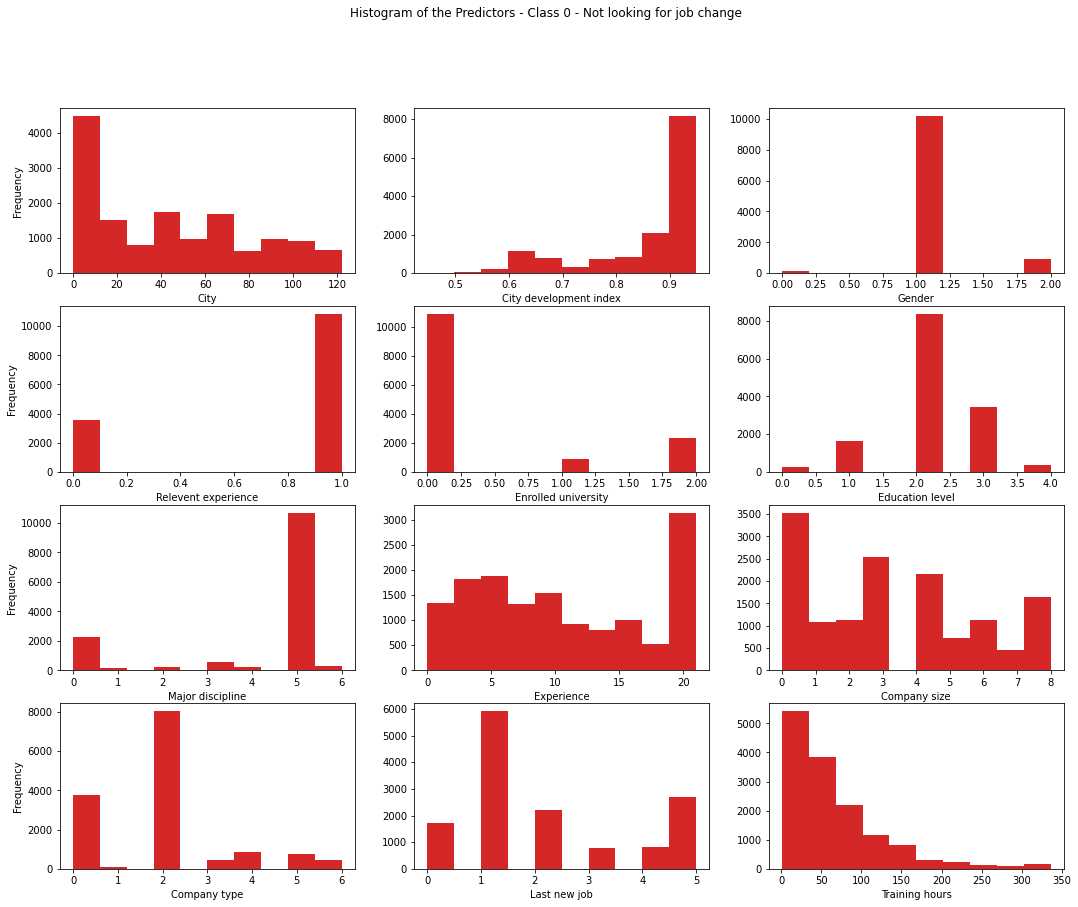

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(18, 14))
fig.suptitle('Histogram of the Predictors - Class 0 - Not looking for job change')
axs[0, 0].hist(cls.get_group(0)['city'], color = 'C3')


axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xlabel('City')

axs[0, 1].hist(cls.get_group(0)['city_development_index'], color = 'C3')
axs[0, 1].set_xlabel('City development index')

axs[0, 2].hist(cls.get_group(0)['gender'], color = 'C3')
axs[0, 2].set_xlabel('Gender')

axs[1, 0].set_ylabel('Frequency')
axs[1, 0].hist(cls.get_group(0)['relevent_experience'], color = 'C3')
axs[1, 0].set_xlabel('Relevent experience')

axs[1, 1].hist(cls.get_group(0)['enrolled_university'], color = 'C3')
axs[1, 1].set_xlabel('Enrolled university')

axs[1, 2].hist(cls.get_group(0)['education_level'], color = 'C3')
axs[1, 2].set_xlabel('Education level')

axs[2, 0].set_ylabel('Frequency')
axs[2, 0].hist(cls.get_group(0)['major_discipline'], color = 'C3')
axs[2, 0].set_xlabel('Major discipline')

axs[2, 1].hist(cls.get_group(0)['experience'], color = 'C3')
axs[2, 1].set_xlabel('Experience')

axs[2, 2].hist(cls.get_group(0)['company_size'], color = 'C3')
axs[2, 2].set_xlabel('Company size')

axs[3, 0].set_ylabel('Frequency')
axs[3, 0].hist(cls.get_group(0)['company_type'], color = 'C3')
axs[3, 0].set_xlabel('Company type')

axs[3, 1].hist(cls.get_group(0)['last_new_job'], color = 'C3')
axs[3, 1].set_xlabel('Last new job')


axs[3, 2].hist(cls.get_group(0)['training_hours'], color = 'C3')
axs[3, 2].set_xlabel('Training hours')

plt.savefig('class_0.pdf')

###Histograma de cada preditor para classe de valor 1
1 – Looking for job change

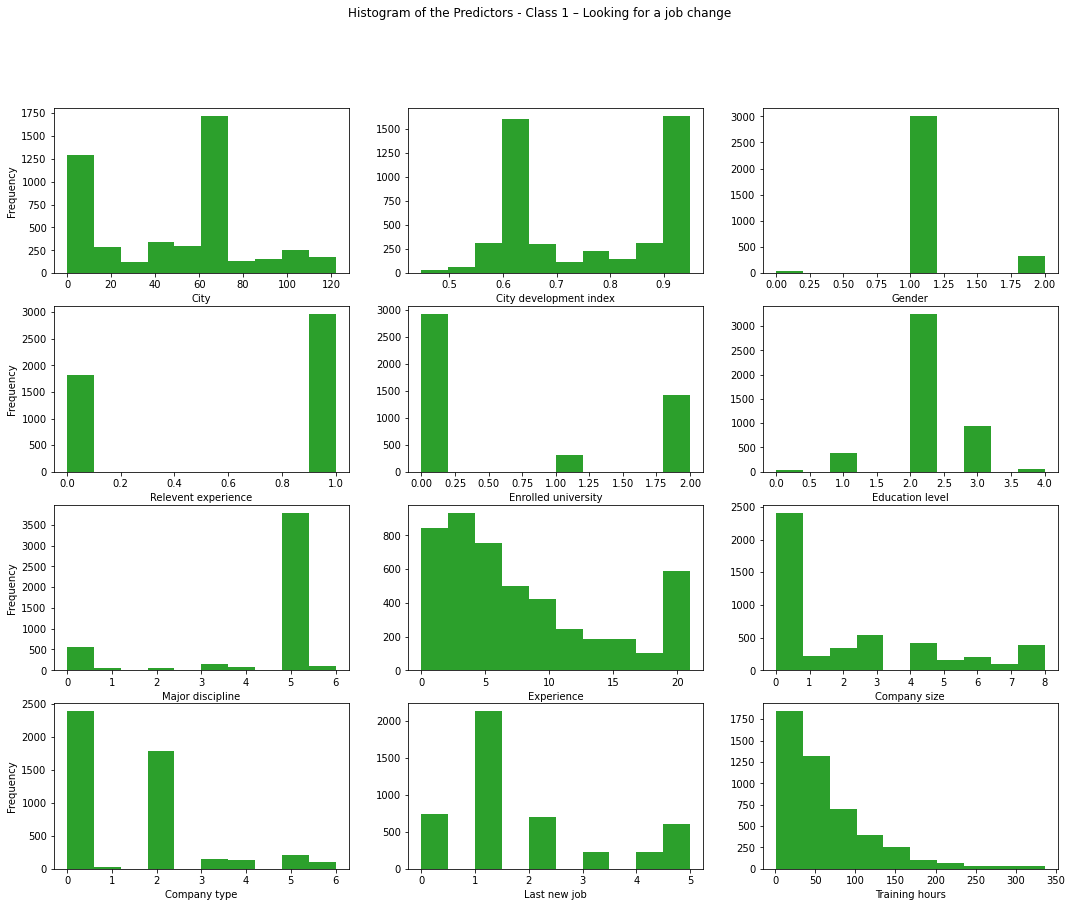

In [ ]:
fig, axs = plt.subplots(4, 3, figsize=(18, 14))
fig.suptitle('Histogram of the Predictors - Class 1 – Looking for a job change')

axs[0, 0].hist(cls.get_group(1)['city'], color = 'C2')


axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xlabel('City')

axs[0, 1].hist(cls.get_group(1)['city_development_index'], color = 'C2')
axs[0, 1].set_xlabel('City development index')

axs[0, 2].hist(cls.get_group(1)['gender'], color = 'C2')
axs[0, 2].set_xlabel('Gender')

axs[1, 0].set_ylabel('Frequency')
axs[1, 0].hist(cls.get_group(1)['relevent_experience'], color = 'C2')
axs[1, 0].set_xlabel('Relevent experience')

axs[1, 1].hist(cls.get_group(1)['enrolled_university'], color = 'C2')
axs[1, 1].set_xlabel('Enrolled university')

axs[1, 2].hist(cls.get_group(1)['education_level'], color = 'C2')
axs[1, 2].set_xlabel('Education level')

axs[2, 0].set_ylabel('Frequency')
axs[2, 0].hist(cls.get_group(1)['major_discipline'], color = 'C2')
axs[2, 0].set_xlabel('Major discipline')

axs[2, 1].hist(cls.get_group(1)['experience'], color = 'C2')
axs[2, 1].set_xlabel('Experience')

axs[2, 2].hist(cls.get_group(1)['company_size'], color = 'C2')
axs[2, 2].set_xlabel('Company size')

axs[3, 0].set_ylabel('Frequency')
axs[3, 0].hist(cls.get_group(1)['company_type'], color = 'C2')
axs[3, 0].set_xlabel('Company type')

axs[3, 1].hist(cls.get_group(1)['last_new_job'], color = 'C2')
axs[3, 1].set_xlabel('Last new job')


axs[3, 2].hist(cls.get_group(1)['training_hours'], color = 'C2')
axs[3, 2].set_xlabel('Training hours')

plt.savefig('class_1.pdf')

Comment on the results, highlight any remarkable fact that emerge from this exploratory analysis. Are there predictors that seem to show any discriminative power (as in, ‘are they, alone, capable to separate the classes’)?

## Task 4
Perform an unconditional bi-variate analysis of the predictors. Specifically, you must plot the scatter plots between all pairs of predictors. For each point (observation), use colours or symbols to indicate the associated class label. Investigate the existence of potential relationships between pairs of predictors and the presence of potential outliers.

Conjunto de dados dos preditores

In [ ]:
# Saving the data into a new variable, excluding the columns enrollee_id and target:
dftrainpredictors = dftrain.drop(columns=['enrollee_id','target'])
dftrainpredictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  int64  
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  float64
 3   relevent_experience     19158 non-null  int64  
 4   enrolled_university     18772 non-null  float64
 5   education_level         18698 non-null  float64
 6   major_discipline        19158 non-null  int64  
 7   experience              19093 non-null  float64
 8   company_size            19158 non-null  int64  
 9   company_type            19158 non-null  int64  
 10  last_new_job            18735 non-null  float64
 11  training_hours          19158 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 1.8 MB


### Matriz de correlação dos preditores

In [ ]:
# Computing the cross correlation of the data:
data_pair_corr = dftrainpredictors.corr()
display(data_pair_corr)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
city,1.000000,-0.326104,-0.021421,-0.006154,0.076778,-0.015137,0.008244,-0.118830,-0.065841,-0.048937,-0.077415,0.009537
city_development_index,-0.326104,1.000000,0.001854,0.059808,-0.173672,0.032029,-0.042967,0.333967,0.101128,0.082531,0.188984,0.001920
gender,-0.021421,0.001854,1.000000,-0.008954,-0.015210,0.072781,0.046832,-0.053272,0.022788,0.046707,-0.014112,0.002555
relevent_experience,-0.006154,0.059808,-0.008954,1.000000,-0.385535,0.230251,0.302160,0.340185,0.294544,0.219241,0.246657,0.011566
enrolled_university,0.076778,-0.173672,-0.015210,-0.385535,1.000000,-0.175324,-0.135991,-0.347810,-0.213153,-0.133568,-0.243631,-0.003709
education_level,-0.015137,0.032029,0.072781,0.230251,-0.175324,1.000000,0.639996,0.276181,0.203288,0.190124,0.197172,-0.011275
major_discipline,0.008244,-0.042967,0.046832,0.302160,-0.135991,0.639996,1.000000,0.202117,0.226297,0.180142,0.176574,-0.005483
experience,-0.118830,0.333967,-0.053272,0.340185,-0.347810,0.276181,0.202117,1.000000,0.170084,0.101346,0.479033,0.000908
company_size,-0.065841,0.101128,0.022788,0.294544,-0.213153,0.203288,0.226297,0.170084,1.000000,0.452917,0.204273,-0.003488
company_type,-0.048937,0.082531,0.046707,0.219241,-0.133568,0.190124,0.180142,0.101346,0.452917,1.000000,0.126920,0.002614


### Mapa de calor dos preditores

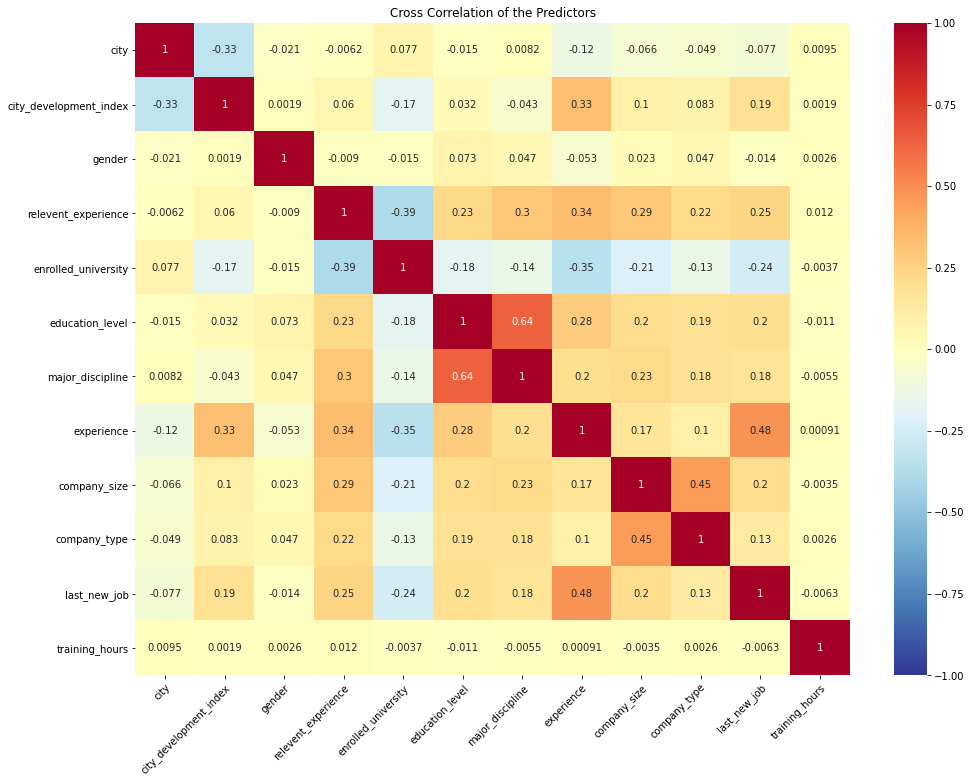

In [ ]:
# Visualizing the correlation matrix as heatmap:
fig, ax = plt.subplots(figsize=(16,12))         # Sample figsize in inches
ax = sns.heatmap(data_pair_corr, annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1)
ax.set_title('Cross Correlation of the Predictors')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.savefig('cross2.pdf')
plt.show()

### Distribuição dos preditores por classe

In [ ]:
sns.pairplot(dftrain, hue='target', vars=dftrain.columns[1:-1], diag_kind="hist")

## Task 5
Perform an unconditional multi-variate analysis of the predictors. Specifically, you must perform a principal components analysis of the predictors, retain only the first two principal components (those associated with the two largest eigenvalues) and plot the scatter plot of the projected observations. Again, for each projected point (observation) you must use colours or symbols to indicate the associated class label. [Remember to perform the necessary pre-processing of the data]


### Porcentagem de elementos faltantes por coluna
Para fazer o PCA precisamos tratar o conjunto de dados quanto aos elementos faltantes

In [ ]:
dftrainpredictors.isnull().sum()/dftrainpredictors.shape[0] * 100 #Porcentagem de elementos faltantes

city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline           0.000000
experience                 0.339284
company_size               0.000000
company_type               0.000000
last_new_job               2.207955
training_hours             0.000000
dtype: float64

### Pré processamento dos dados
Retirando a coluna de gênero (gender) e as linhas do conjunto de dados que possuem elementos faltantes

In [ ]:
# Saving the data into a new variable, excluding the column gender:
dftrainpredictorsnew = dftrainpredictors.drop(columns=['gender'])
dftrainnew = dftrain.drop(columns=['gender']) 
# Saving the data into a new variable, excluding the lines with NaN values:
dftrainwithoutNaN = dftrainpredictorsnew.dropna()
dftrainnew = dftrainnew.dropna()
dftrainwithoutNaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18014 non-null  int64  
 1   city_development_index  18014 non-null  float64
 2   relevent_experience     18014 non-null  int64  
 3   enrolled_university     18014 non-null  float64
 4   education_level         18014 non-null  float64
 5   major_discipline        18014 non-null  int64  
 6   experience              18014 non-null  float64
 7   company_size            18014 non-null  int64  
 8   company_type            18014 non-null  int64  
 9   last_new_job            18014 non-null  float64
 10  training_hours          18014 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.6 MB


Subtraindo a média de cada dado e dividindo pelo desvio padrão obtemos os dados com média zero e variância igual a 1

In [ ]:
# Centering and scaling the data (with zero mean and unit variance):
scaled_dftrain = dftrainwithoutNaN.iloc[:,:]
scaled_dftrain = (scaled_dftrain - scaled_dftrain.mean())/scaled_dftrain.std()

Média aproximadamente zero e desvio padrão 1 (variância 1)

In [ ]:
# Computing the mean, std, and skewness of the dataset:
unc_monovar_scaled = scaled_dftrain.describe().iloc[1:3,:].append(scaled_dftrain.skew()[:], ignore_index=True)
unc_monovar_scaled.index = ['Mean','std','Skewness']
display(unc_monovar_scaled.T)

,Mean,std,Skewness
city,-1.860151e-16,1.0,0.407721
city_development_index,-5.738911e-14,1.0,-1.045837
relevent_experience,1.376839e-16,1.0,-1.048885
enrolled_university,4.295319e-16,1.0,1.297946
education_level,7.014608e-16,1.0,-0.080394
major_discipline,9.577476e-16,1.0,-1.836905
experience,-1.960979e-16,1.0,0.378347
company_size,-1.361062e-16,1.0,0.476149
company_type,2.650385e-16,1.0,0.749646
last_new_job,3.023130e-16,1.0,0.787117


###PCA

####Curva representativa da informação por número de componentes

In [ ]:
pca = PCA(n_components=11)
scaled_dftrain_pca = pca.fit_transform(scaled_dftrain)

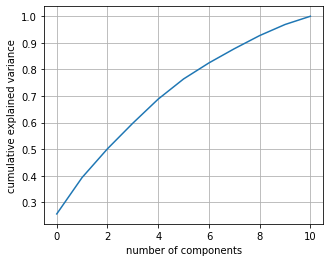

In [ ]:
plt.figure(figsize=[5,4])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()
plt.savefig('pca.pdf')

####Cálculo do PCA com duas componentes

In [ ]:
pca = PCA(n_components=2)

In [ ]:
scaled_dftrain_pca = pca.fit_transform(scaled_dftrain)


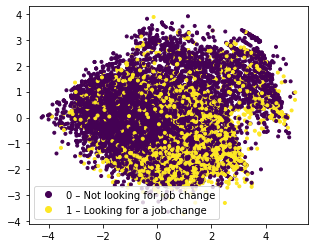

In [ ]:
plt.figure(figsize=[5,4])
#cores = ListedColormap(['r','b'])
scatter = plt.scatter(scaled_dftrain_pca[:,0], scaled_dftrain_pca[:,1], c=dftrainnew['target'], marker='.')
classes = ['0 – Not looking for job change', '1 – Looking for a job change']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.savefig('pca2.pdf')

In [ ]:
# PCA:
# Computing the covariance matrix of the standardized data:
mt_cov = scaled_dftrain.cov().values
# Computing eigenvectors and eigenvalues:
val, vec = np.linalg.eig(mt_cov)
# Ordering the eigenvalues and the matix of the eigenvectors:
idx = val.argsort()[::-1] # Getting descending ordered indexes
val_ord = val[idx]
vec_ord = vec[:,idx]
# Defining projection matrix by selecting the first two PC's:
W = np.stack([vec_ord[:,0], vec_ord[:,1]], axis=1)
# Projecting data on the PC's:
PC = scaled_dftrain.dot(W)
# Show steps:
np.set_printoptions(4)
#print(f'''Covariance matrix of the data:
#{mt_cov}\n\nEigenvalues:
#{val}\n\nMatix of the eigenvectors:
#{vec}\n\nOrdered eigenvalues: 
#{val_ord}\n\nOrdered eigenvectors:
#{vec_ord}\n\nProjection matrix:
#{W}\n\nTransformed dataset:
#{PC.head(7)}''')

In [ ]:
plt.figure(figsize=[6,6])
scatter = plt.scatter(PC.iloc[:,0], PC.iloc[:,1], c=dftrainnew['target'], marker='o')
classes = ['0 – Not looking for job change', '1 – Looking for a job change']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
# Ploting vectors:
for i in range(len(W)):
    # Arrows project features as vectors
    plt.arrow(0, 0, W[i, 0]*np.max(PC.iloc[:,0].values), 
                    W[i, 1]*np.max(PC.iloc[:,1].values),
                    color='k', width=0.04, head_width=0.3, alpha=0.65)
    # Labels
    plt.text(W[i,0]*np.max(PC.iloc[:,0])*1.2, 
             W[i, 1]*max(PC.iloc[:,1])*1.2,
             dftrainnew.columns.values[i], color='w')
plt.title('PCA Biplot')
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.show()